In [1]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
#Importing the categorised data
data = pd.read_excel("WithCat4.xlsx")
data['Category'].value_counts()

WP    166
TO    150
CB    143
TB    140
H     132
CH    130
EP    119
R     117
A     112
Name: Category, dtype: int64

In [3]:
#Splitting the data into features and labels 
fdata = data.loc[0:1209,['Company']]
ldata = data.loc[0:1209,['Category']]

In [4]:
print(fdata)
print(ldata)

                                                Company
0                           Barcelona Convention Bureau
1            Belgium - Visit.Brussels Convention Bureau
2        Cologne Convention Bureau – Kölntourismus Gmbh
3                          Convention Bureau Düsseldorf
4                       Convention Bureau Lower Austria
5                       Convention Bureau Upper Austria
6                                  Convention Edinburgh
7                       Croatian National Tourist Board
8     Cyprus Tourism Organisation - Cyprus Conventio...
9                Czechtourism - Czech Convention Bureau
10                        La Cité des Congrès de Nantes
11                             Dublin Convention Bureau
12                          Edinburgh Conference Centre
13                            Finland Convention Bureau
14                          Frankfurt Convention Bureau
15             Georgia Convention And Exhibition Bureau
16                       German Convention Burea

In [5]:
#Cleaning the Comapny names - Getting rid of the punctuation marks, etc.
fdata['Company'] = fdata['Company'].str.replace('[{}]'.format(string.punctuation), '')
fdata['Company'] = fdata['Company'].str.replace('-', '')
fdata['Company'] = fdata['Company'].str.replace('.', '')
fdata['Company'] = fdata['Company'].str.replace(' - ', '')

In [6]:
#The cleaned feature data
fdata

,Company
0,Barcelona Convention Bureau
1,Belgium VisitBrussels Convention Bureau
2,Cologne Convention Bureau – Kölntourismus Gmbh
3,Convention Bureau Düsseldorf
4,Convention Bureau Lower Austria
5,Convention Bureau Upper Austria
6,Convention Edinburgh
7,Croatian National Tourist Board
8,Cyprus Tourism Organisation Cyprus Convention...
9,Czechtourism Czech Convention Bureau


In [7]:
#Tokenizing the feature data, i.e.,the company names and then forming sequences.
vocabulary_size = 1500
tokenizer = Tokenizer(num_words= vocabulary_size, lower = True)
tokenizer.fit_on_texts(fdata['Company'])
sequences = tokenizer.texts_to_sequences(fdata['Company'])
data = pad_sequences(sequences, maxlen=5, padding = 'post', truncating = 'pre')

In [8]:
#This is how a Sequence looks like
data[0]

array([67,  1,  2,  0,  0])

In [9]:
#The LSTM model.
model = Sequential()
model.add(Embedding(2000, 100, input_length=5))
model.add(LSTM(100, dropout=0, recurrent_dropout=0.2))
model.add(Dense(9, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#Cleaning the Category data.
# ldata['Category'] = ldata['Category'].str.replace('Congress center', 'CC')
# ldata['Category'] = ldata['Category'].str.replace('Conference center', 'CC')
# ldata.loc[ldata.Category == 'T', 'Category'] = 'TO'
# ldata

In [11]:
#Encoding the category data for the model.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
y=ldata["Category"]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[1 1 1 ... 4 4 4]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
#The different categories in the data
ldata.Category.unique()

array(['CB', 'TB', 'TO', 'H', 'CH', 'R', 'WP', 'EP', 'A'], dtype=object)

In [13]:
#Fitting the model : The model gives an accuracy of 89.45% and a validation accuracy of 90.9%
history = model.fit(data, np.array(onehot_encoded), validation_split=0.30, epochs=100)

Train on 846 samples, validate on 363 samples
Epoch 1/100
846/846 [==============================] - 3s 3ms/step - loss: 0.5012 - acc: 0.8889 - val_loss: 0.3483 - val_acc: 0.8889
Epoch 2/100
846/846 [==============================] - 1s 612us/step - loss: 0.3325 - acc: 0.8889 - val_loss: 0.3390 - val_acc: 0.8889
Epoch 3/100
846/846 [==============================] - 1s 602us/step - loss: 0.3133 - acc: 0.8889 - val_loss: 0.3359 - val_acc: 0.8889
Epoch 4/100
846/846 [==============================] - 1s 608us/step - loss: 0.2973 - acc: 0.8889 - val_loss: 0.3331 - val_acc: 0.8889
Epoch 5/100
846/846 [==============================] - 1s 611us/step - loss: 0.2790 - acc: 0.8889 - val_loss: 0.3299 - val_acc: 0.8889
Epoch 6/100
846/846 [==============================] - 1s 611us/step - loss: 0.2584 - acc: 0.8889 - val_loss: 0.3328 - val_acc: 0.8889
Epoch 7/100
846/846 [==============================] - 1s 609us/step - loss: 0.2360 - acc: 0.8898 - val_loss: 0.3195 - val_acc: 0.8907
Epoch 8/100

Epoch 61/100
846/846 [==============================] - 1s 652us/step - loss: 8.1372e-04 - acc: 0.8973 - val_loss: 0.3165 - val_acc: 0.9143
Epoch 62/100
846/846 [==============================] - 1s 651us/step - loss: 7.9712e-04 - acc: 0.8976 - val_loss: 0.3164 - val_acc: 0.9137
Epoch 63/100
846/846 [==============================] - 1s 634us/step - loss: 6.8934e-04 - acc: 0.8968 - val_loss: 0.3172 - val_acc: 0.9143
Epoch 64/100
846/846 [==============================] - 1s 648us/step - loss: 4.0659e-04 - acc: 0.8952 - val_loss: 0.3166 - val_acc: 0.9140
Epoch 65/100
846/846 [==============================] - 1s 634us/step - loss: 6.6938e-04 - acc: 0.8966 - val_loss: 0.3209 - val_acc: 0.9140
Epoch 66/100
846/846 [==============================] - 1s 647us/step - loss: 6.0260e-04 - acc: 0.8962 - val_loss: 0.3206 - val_acc: 0.9140
Epoch 67/100
846/846 [==============================] - 1s 647us/step - loss: 5.4605e-04 - acc: 0.8960 - val_loss: 0.3168 - val_acc: 0.9140
Epoch 68/100
846/846

In [14]:
#model.fit(data, np.array(onehot_encoded), validation_split=0.4, epochs=100)

In [15]:
model.save_weights('OTM_weights.h5')

In [16]:
#Reading the data with missing Categories.
nocat = pd.read_excel("NoCat.xlsx")
nocat

,Category,Status,Company,Contact Person,Designation,Decision maker,Email ID,Phone,Notes prospects (for sentiment analisys),Country,Website,Address,Notes sales process,Unnamed: 13,Unnamed: 14,Unnamed: 15
577,NaN,Cold lead,CRB CITYRAMA Travel Agency,Tünde MOGYORÓSI,Manager of Incoming Department,yes,Cityrama@cityrama.hu,NaN,NaN,Hungary,NaN,NaN,"If I have to hit a button only, I would hit: 4...",NaN,NaN,NaN
588,NaN,NaN,HOTEL INTERNATIONAL IASI,AlexandruHOLBANEL,Sales Executive,yes,sales@hotelinternationaliasi.ro,NaN,NaN,Romania,NaN,NaN,NaN,NaN,NaN,NaN
589,NaN,NaN,Tirolwerbung,AngelaSemrajc,Employee,yes,Angela.semrajc@tirolwerbung.at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,NaN,NaN,Polish National Tourist Office,AnnaCichońska,Director,yes,NaN,NaN,USA and Canda market,Poland,NaN,NaN,NaN,NaN,NaN,NaN
592,NaN,NaN,Rynek Turystyczny,AnnaJanuszewska,Marketing and Commercials Specialist,yes,a.januszewska@pws-promedia.pl,NaN,This is Tourist Magazine - partner with Polski...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,NaN,NaN,Zadar Tourist Board,AnteGalić,Public Relations & Marketing,yes,ante@zadar.travel,NaN,NaN,Croatia,NaN,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,Biuro Wadi,ArturPiszczek,Owner,yes,biuro@wadi.pl,NaN,NaN,Poland,NaN,NaN,NaN,NaN,NaN,NaN
595,NaN,NaN,Emilia Kubik,BarbaraTutak,"Główny Specjalista, Lider Projektu",yes,barbara.tutak@pot.gov.pl,NaN,NaN,Poland,NaN,NaN,NaN,NaN,NaN,NaN
596,NaN,NaN,Orthanna Spltd,BoyanaKostadinova,Manager,yes,b.kostadinova@orthanna.com,NaN,NaN,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,88 Rooms,BranimirMladenovic,Sales and marketing administrator,yes,branimir.mladenovic@88rooms.com,NaN,NaN,Serbia,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Splitting the 'Company column'
nc = nocat.loc[0:899,['Company']]

In [18]:
nc

,Company
577,CRB CITYRAMA Travel Agency
588,HOTEL INTERNATIONAL IASI
589,Tirolwerbung
591,Polish National Tourist Office
592,Rynek Turystyczny
593,Zadar Tourist Board
594,Biuro Wadi
595,Emilia Kubik
596,Orthanna Spltd
597,88 Rooms


In [19]:
#Applying the same cleaning techniques applied above.
nc['Company'] = nc['Company'].str.replace('[{}]'.format(string.punctuation), '')
nc['Company'] = nc['Company'].str.replace('-', '')
nc['Company'] = nc['Company'].str.replace('.', '')
nc['Company'] = nc['Company'].str.replace(' - ', '')
nc

,Company
577,CRB CITYRAMA Travel Agency
588,HOTEL INTERNATIONAL IASI
589,Tirolwerbung
591,Polish National Tourist Office
592,Rynek Turystyczny
593,Zadar Tourist Board
594,Biuro Wadi
595,Emilia Kubik
596,Orthanna Spltd
597,88 Rooms


In [20]:
#Creating the sequence, similar to the process used above
vocabulary_size = 250
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(nc['Company'])
sequences = tokenizer.texts_to_sequences(nc['Company'])
d = pad_sequences(sequences, maxlen = 5, padding = 'post', truncating = 'pre')

In [21]:
#Predicting the Categories for the Companies.
model.predict(d, verbose = 1)

112/112 [==============================] - 0s 1ms/step


array([[0.        , 0.        , 1.4096828 , ..., 0.38742864, 0.        ,
        0.        ],
       [1.090119  , 0.        , 0.        , ..., 0.06081982, 0.16097927,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.003399  , 0.        ,
        0.18057033],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 2.0959194 ,
        0.3432438 ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.6630793 ,
        0.16190028],
       [0.        , 1.1546372 , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [22]:
prediction = model.predict(d)

In [23]:
prediction

array([[0.        , 0.        , 1.4096828 , ..., 0.38742864, 0.        ,
        0.        ],
       [1.090119  , 0.        , 0.        , ..., 0.06081982, 0.16097927,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.003399  , 0.        ,
        0.18057033],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 2.0959194 ,
        0.3432438 ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.6630793 ,
        0.16190028],
       [0.        , 1.1546372 , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [24]:
prediction[1]

array([1.090119  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06081982, 0.16097927, 0.        ], dtype=float32)

In [25]:
#Assigning the Max vaue to each row
p =(prediction == prediction.max(axis=1)[:,None]).astype(float)

In [26]:
p[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
df = pd.DataFrame(p)
df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df['Category'] = 'x'
df

,0,1,2,3,4,5,6,7,8,Category
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,x
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,x
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,x
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,x
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,x
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,x
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,x
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,x
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,x
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,x


In [29]:
#Decoding the onehot-encoded values to give a readable output
df.loc[df[0] == 1.0, 'Category'] = 'A'
df.loc[df[1] == 1.0, 'Category'] = 'CB'
df.loc[df[2] == 1.0, 'Category'] = 'CH'
df.loc[df[3] == 1.0, 'Category'] = 'EP'
df.loc[df[4] == 1.0, 'Category'] = 'H'
df.loc[df[5] == 1.0, 'Category'] = 'R'
df.loc[df[6] == 1.0, 'Category'] = 'TB'
df.loc[df[7] == 1.0, 'Category'] = 'TO'
df.loc[df[8] == 1.0, 'Category'] = 'WP'

In [30]:
df

,0,1,2,3,4,5,6,7,8,Category
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CH
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,H
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,TB
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,H
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CB
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,WP
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,TB
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,H
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CB


In [31]:
x = nocat['Company']
x.index = range(112)
x = pd.DataFrame(x)
x

,Company
0,CRB CITYRAMA Travel Agency
1,HOTEL INTERNATIONAL IASI
2,Tirolwerbung
3,Polish National Tourist Office
4,Rynek Turystyczny
5,Zadar Tourist Board
6,Biuro Wadi
7,Emilia Kubik
8,Orthanna Spltd
9,88 Rooms


In [32]:
df = pd.concat([df, x['Company']], axis = 1)

In [33]:
df = df[['Category', 'Company']]
df

,Category,Company
0,CH,CRB CITYRAMA Travel Agency
1,A,HOTEL INTERNATIONAL IASI
2,H,Tirolwerbung
3,TB,Polish National Tourist Office
4,H,Rynek Turystyczny
5,CB,Zadar Tourist Board
6,WP,Biuro Wadi
7,TB,Emilia Kubik
8,H,Orthanna Spltd
9,CB,88 Rooms


In [34]:
#Saving it to an Excel sheet
df.to_excel("pred12.xlsx")

In [35]:
#The count of each actegroy in the prediction
df['Category'].value_counts()

CB    19
TO    16
WP    15
H     14
TB    13
CH    11
A     10
R      9
EP     5
Name: Category, dtype: int64

In [36]:
#Summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 100)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 281,309
Trainable params: 281,309
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show(*args, **kw)>

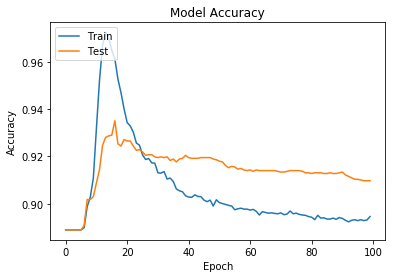

In [39]:
#Visualization of the model Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

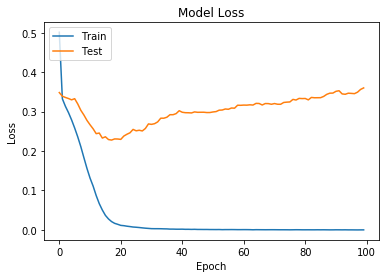

In [40]:
#Visualization of the Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

In [44]:
#Model Accuracy : ~89.45%
history.history['acc'][-1]

0.8945364105222355